In [5]:
import tensorflow as tf
from tensorflow import keras

# 导入辅助库
import numpy as np
import matplotlib.pyplot as plt

# 示例：https://www.tensorflow.org/tutorials/keras/basic_classification

print(tf.__version__)

1.14.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## 关于 Fashion MNIST数据集

Fashion MNIST 旨在替代传统的MNIST数据集 — 它经常被作为机器学习在计算机视觉方向的"Hello, World"。MNIST数据集包含手写数字（0,1,2等）的图像，其格式与我们在此处使用的服装相同。

其中包含了10个类别中共70,000张灰度图像：

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

图像包含了低分辨率（28 x 28像素）的单个服装物品，如下所示:

![](https://tensorflow.org/images/fashion-mnist-sprite.png)


In [3]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
# 一共有10个类别
train_labels[0]

9

In [11]:
train_images[0].shape

(28, 28)

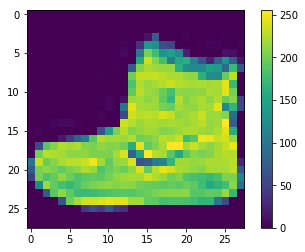

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# 对数据集进行缩放

train_images = train_images / 255.0
test_images = test_images / 255.0

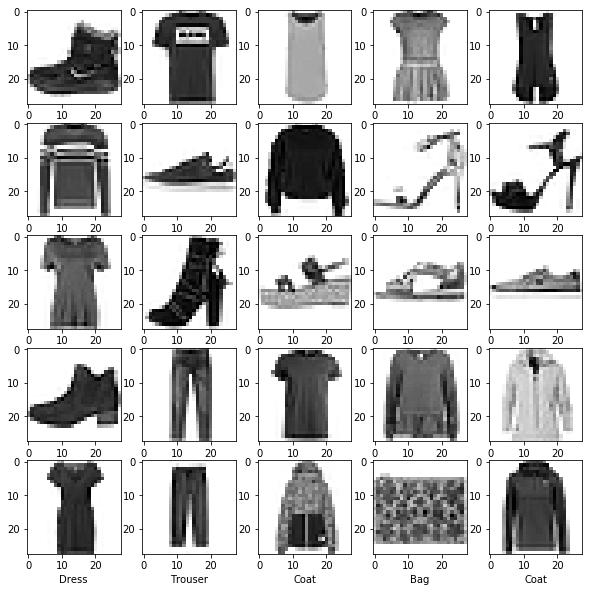

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0718 08:02:24.138403 140538118956928 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# 训练
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4944 - acc: 0.8263
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3732 - acc: 0.8646
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3331 - acc: 0.8784
Epoch 4/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3087 - acc: 0.8862
Epoch 5/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2916 - acc: 0.8926


In [23]:
# 测试
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3527 - acc: 0.8746
Test accuracy: 0.8746


In [0]:
predictions = model.predict(test_images)

In [25]:
predictions[0]

array([2.4026582e-05, 1.2783314e-06, 2.2226857e-06, 7.1164852e-09,
       1.4944923e-06, 7.8650750e-02, 1.6065405e-05, 2.3319621e-01,
       1.7929744e-05, 6.8808997e-01], dtype=float32)

In [27]:
np.argmax(predictions[0]), test_labels[0]

(9, 9)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

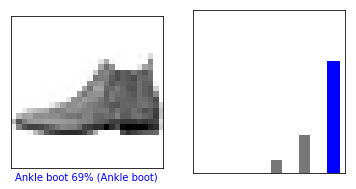

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

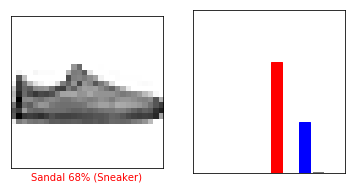

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

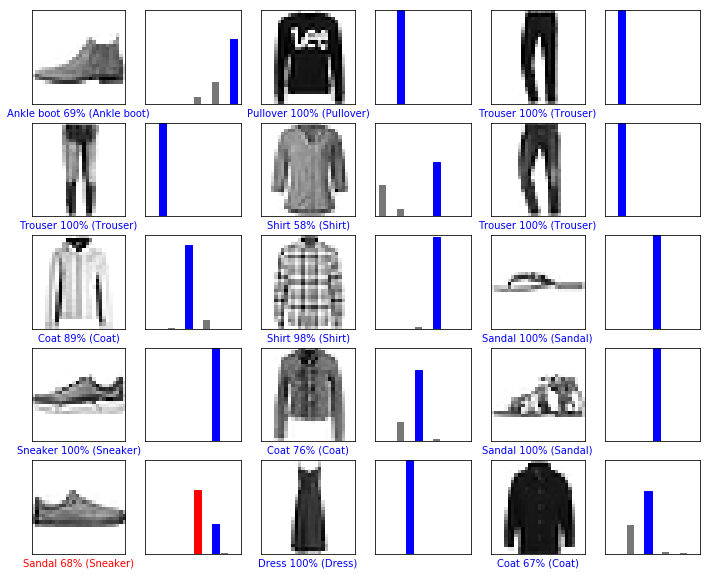

In [34]:
# 绘制前X个测试图像，预测标签和真实标签
# 以蓝色显示正确的预测，红色显示不正确的预测
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [54]:
# 从测试数据集中获取图像
img = test_images[0]

print(img.shape)

(28, 28)


In [55]:
# 将图像添加到批次中，即使它是唯一的成员。
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [0]:
# img = np.array([img])

# img.shape

In [57]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.4026585e-05 1.2783328e-06 2.2226905e-06 7.1164727e-09 1.4944898e-06
  7.8650653e-02 1.6065454e-05 2.3319621e-01 1.7929780e-05 6.8809009e-01]]


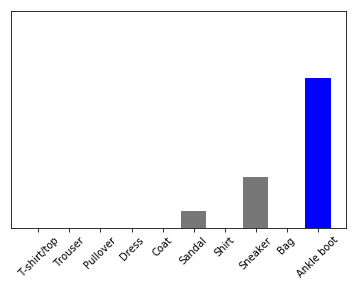

In [58]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()